<span style="color: red; font-size: 2em; font-weight: bold;">Understanding PyPSA’s Components</span>

PyPSA is built around key components:

Networks: The main data structure that represents the power grid. It consists of buses, lines, generators, loads, and other elements.

Buses(Represent connection points for electricity): Nodes in the network where components like generators, loads, or storage units connect(Represent connection points for electricity).

Lines (Transport electricity): Connections between buses that transport power.

Generators ( Produce electricity): Produce power and are associated with costs and constraints.

Loads (Consume electricity): Represent power demand at a bus.

Storage Units: Store and release energy, useful for modeling batteries or other storage solutions.

<span style="color: red; font-size: 2em; font-weight: bold;">Example 1: Generator-Load Network</span>


We’ll create a simple example network with:
    
    Two buses.
        A generator at one bus.
        A load at the other bus.
    A transmission line connecting them.
    

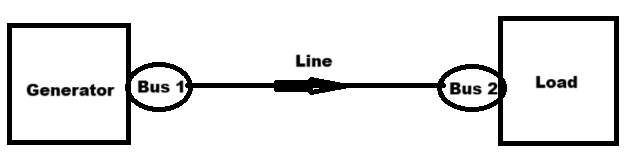

# Step 1: Setting Up the Environment

## Install PyPSA

In [1]:
# You can install PyPSA using pip:
#!pip install pypsa

In [2]:
# Import pypsa 
import pypsa

## Additional Libraries
PyPSA may require other libraries for plotting and numerical operations:

In [3]:
# pip install numpy pandas matplotlib networkx

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Creating Your Network:

## Creating the Network

In [4]:
# Create an empty network
network = pypsa.Network()

## Add buses

In [ ]:
# Add 2 buses
network.add("Bus", "Bus 1", v_nom=20)
network.add("Bus", "Bus 2", v_nom=20)

network.buses

Network: Represents the electrical network.

Bus: A bus represents a point in the system where power is injected or consumed. It’s where all electrical components (load, generator) connect.

v_nom: This is the nominal voltage of the bus. For simplicity, we set it to 20 kV.

## Add a Load
A load consumes power from the grid. Let’s add a load to Bus2 that will consume some power.

In [8]:
# Add a load to Bus 2
network.add("Load", "Load 1", bus="Bus 2", p_set=80, q_set=20)

Load: Represents a power consumer.

bus: The bus where the load is connected.

p_set: The real power demand of the load (in MW). We set it to 50 MW.a Fixed load (MW)

q_set: The reactive power demand (in MVAR). We set it to 0.2 MVAR, which is important for maintaining the voltage stability in the system.

## Add a Generator

In [7]:
# Add a generator to Bus 1 
network.add("Generator", "Gen 1", bus="Bus 1", p_set=60 , marginal_cost=50, control='Slack', ) 

Generator: Represents a generator that supplies power to the grid.

bus: This defines which bus the generator is connected to, in this case, Bus1.

p_nom: Nominal power capacity (MW)
p_set: The power setpoint for the generator, representing the real power it is generating (in MW). We set it to 1.0 MW.
marginal_cost=: Cost of generation ($/MWh)

control='Slack': This makes the generator a slack generator, which means it determines the system's voltage and frequency. In other words, it acts as a reference point.

## Add a Line
Now we will add a transmission line between two buses. For now, let’s set up the line between Bus1 and a second bus, Bus2.

In [9]:
# Add a transmission line connecting Bus 1 and Bus 2
network.add("Line", "Line 1", bus0="Bus 1", bus1="Bus 2", s_nom=60, r=0.02, x=0.05)

Line: Represents a transmission line between two buses.

bus0, bus1: The buses connected by the line.
     bus0="Bus 1",           # Start at Bus 1
     bus1="Bus 2",           # End at Bus 2

s_nom: Nominal capacity (MW)
 
x: The reactance of the line (in per unit). It represents the line’s opposition to alternating current (AC) and impacts the phase difference between voltage and current.

r: The resistance of the line (in per unit). It represents energy losses due to resistance in the transmission.

# Step 3: Check results

In [10]:
print("Generator Output (in MW):")
print(network.generators_t.p)

Generator Output (in MW):
Empty DataFrame
Columns: []
Index: [now]


In [11]:
print("Load Demand (in MW):")
print(network.loads_t.p)

Load Demand (in MW):
Empty DataFrame
Columns: []
Index: [now]


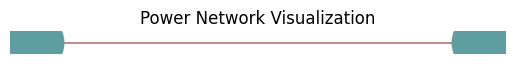

In [12]:
# Visualize the network

import matplotlib.pyplot as plt
network.plot()
plt.title("Power Network Visualization")
plt.show()

In [13]:
# Print the network
print(network)

PyPSA Network
Components:
 - Bus: 2
 - Generator: 1
 - Line: 1
 - Load: 1
Snapshots: 1


# Step 4: Solving the Network
PyPSA includes tools for solving network power flows and optimization problems.

## Power Flow Calculation
After setting up the network, calculate the power flow:
We will now solve the network to find the power flow, voltages at each bus, and the power transmitted through the lines.

In [14]:
# Run the power flow calculation
network.lpf()  # Linear Power Flow (Faster)

print("-----------------")

network.pf()   # Full Power Flow (More accurate)

# Increase iterations for convergence

INFO:pypsa.pf:Performing linear load-flow on AC sub-network SubNetwork 0 for snapshot(s) Index(['now'], dtype='object', name='snapshot')
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object', name='snapshot')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.021027 seconds


{'n_iter': SubNetwork  0
 snapshot     
 now         3,
 'error': SubNetwork             0
 snapshot                
 now         1.058709e-12,
 'converged': SubNetwork     0
 snapshot        
 now         True}

lpf(): Linear power flow is a faster but less accurate method for solving the power flow.

pf(): Full power flow is a more accurate method that takes into account nonlinearities in the system.

## Examine Power Flows

You can inspect the power flows on lines and outputs of generators:

In [15]:
# Generator outputs
print(network.generators_t.p)

Generator      Gen 1
snapshot            
now        80.344522


In [16]:
# Power flows on lines
print(network.lines_t.p0)  # Power flow at the "from" end of lines
print(network.lines_t.p1)  # Power flow at the "to" end of lines

             Line 1
snapshot           
now       80.344522
          Line 1
snapshot        
now        -80.0


## Voltage Angles

To examine bus voltage angles:

In [17]:
print(network.buses_t.v_ang)

Bus       Bus 1    Bus 2
snapshot                
now         0.0 -0.00906


# Step 4: Optimizing Dispatch
PyPSA can optimize generator dispatch to minimize costs:

Install a Solver

We will use the glpk solver. Alternatively, you can install other solvers like CPLEX or Gurobi if you need more advanced features or better performance. These solvers may require licenses.

In [18]:
#!pip install swiglpk

In [19]:
# Run the following code in Python to check if the solver is available:
import pyomo.environ as pyo
print(pyo.SolverFactory("glpk").available())

True


In [20]:
network.optimize()

INFO:linopy.model: Solve problem using Glpk solver
INFO:linopy.io: Writing time: 0.02s
Status: warning
Termination condition: infeasible_or_unbounded
Solution: 0 primals, 0 duals
Objective: nan
Solver model: not available
Solver message: undefined



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\faaiz\AppData\Local\Temp\linopy-problem-l13u80_m.lp --output
 C:\Users\faaiz\AppData\Local\Temp\linopy-solve-c19l8jy_.sol
Reading problem data from 'C:\Users\faaiz\AppData\Local\Temp\linopy-problem-l13u80_m.lp'...
6 rows, 2 columns, 7 non-zeros
36 lines were read
GLPK Simplex Optimizer 5.0
6 rows, 2 columns, 7 non-zeros
Preprocessing...
PROBLEM HAS NO PRIMAL FEASIBLE SOLUTION
If you need actual output for non-optimal solution, use --nopresol
Time used:   0.0 secs
Memory used: 0.0 Mb (32013 bytes)
Writing basic solution to 'C:\Users\faaiz\AppData\Local\Temp\linopy-solve-c19l8jy_.sol'...


('warning', 'infeasible_or_unbounded')

Generator Outputs:

In [21]:
print(network.generators_t.p)
#This shows the power generated by each generator.

Generator      Gen 1
snapshot            
now        80.344522


Line Flows:

In [22]:
print(network.lines_t.p0)  # Power flow at the "from" end of lines
print(network.lines_t.p1)  # Power flow at the "to" end of lines

             Line 1
snapshot           
now       80.344522
          Line 1
snapshot        
now        -80.0
